# DATA PREPROCESSING

In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/cancer.csv")

In [7]:
df.head()

,subjid,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,1,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,2,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,3,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,4,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,5,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [8]:
df.isnull().sum()

subjid         0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subjid       286 non-null    int64 
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
 10  Class        286 non-null    object
dtypes: int64(2), object(9)
memory usage: 24.7+ KB


In [10]:
df['Class'].unique()

array(['recurrence-events', 'no-recurrence-events'], dtype=object)

In [11]:
label_map={
      'age':{'20-29':1,'30-39':2,'40-49':3,'50-59':4,'60-69':5,'70-79':6},
      'tumor-size':{'0-4':1,'5-9':2,'10-14':3,'15-19':4,'20-24':5,'25-29':6,'30-34':7,'35-39':8,'40-44':9,'45-49':10,'50-54':11},
      'inv-nodes':{'24-26':7,'15-17':6,'12-14':5,'9-11':4,'6-8':3,'3-5':2,'0-2':1},
          }

In [12]:
df.replace(label_map,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   subjid       286 non-null    int64 
 1   age          286 non-null    int64 
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    int64 
 4   inv-nodes    286 non-null    int64 
 5   node-caps    278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
 10  Class        286 non-null    object
dtypes: int64(5), object(6)
memory usage: 24.7+ KB


In [14]:
df_obj = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [15]:
df_obj_new=pd.get_dummies(df_obj,drop_first=True)

In [16]:
df_new = pd.concat([df_num,df_obj_new],axis=1)

In [17]:
df_new.isnull().sum()

subjid                     0
age                        0
tumor-size                 0
inv-nodes                  0
deg-malig                  0
menopause_lt40             0
menopause_premeno          0
node-caps_yes              0
breast_right               0
breast-quad_left_low       0
breast-quad_left_up        0
breast-quad_right_low      0
breast-quad_right_up       0
irradiat_yes               0
Class_recurrence-events    0
dtype: int64

In [18]:
df_new.head()

,subjid,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,Class_recurrence-events
0,1,3,4,1,3,0,1,1,1,0,1,0,0,0,1
1,2,4,4,1,1,0,0,0,1,0,0,0,0,0,0
2,3,4,8,1,2,0,0,0,0,1,0,0,0,0,1
3,4,3,8,1,3,0,1,1,1,1,0,0,0,1,0
4,5,3,7,2,2,0,1,1,0,0,0,0,1,0,1


In [19]:
df_new.describe()

,subjid,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes,Class_recurrence-events
count,286.0000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,143.5000,3.664336,5.881119,1.517483,2.048951,0.024476,0.524476,0.195804,0.468531,0.384615,0.339161,0.083916,0.115385,0.237762,0.297203
std,82.7053,1.011818,2.105930,1.110417,0.738217,0.154791,0.500276,0.397514,0.499883,0.487357,0.474254,0.277748,0.320046,0.426459,0.457828
min,1.0000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.2500,3.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,143.5000,4.000000,6.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,214.7500,4.000000,7.000000,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,286.0000,6.000000,11.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Create Training and test sets

In [20]:
X = df_new.drop('Class_recurrence-events',axis=1)
Y = df_new['Class_recurrence-events']

In [21]:
X

,subjid,age,tumor-size,inv-nodes,deg-malig,menopause_lt40,menopause_premeno,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,1,3,4,1,3,0,1,1,1,0,1,0,0,0
1,2,4,4,1,1,0,0,0,1,0,0,0,0,0
2,3,4,8,1,2,0,0,0,0,1,0,0,0,0
3,4,3,8,1,3,0,1,1,1,1,0,0,0,1
4,5,3,7,2,2,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,282,4,7,3,2,0,0,1,0,1,0,0,0,0
282,283,4,6,2,2,0,1,1,0,1,0,0,0,1
283,284,2,7,3,2,0,1,1,1,0,0,0,1,0
284,285,4,4,1,2,0,1,0,1,1,0,0,0,0


In [22]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
281    0
282    0
283    0
284    0
285    0
Name: Class_recurrence-events, Length: 286, dtype: uint8

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size = 0.3, 
                                                    random_state=2021,
                                                    stratify=Y)

# Preprocessing-Scaling the features

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# Naive Bayes

[[56  4]
 [20  6]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        60
           1       0.60      0.23      0.33        26

    accuracy                           0.72        86
   macro avg       0.67      0.58      0.58        86
weighted avg       0.70      0.72      0.68        86

0.7209302325581395


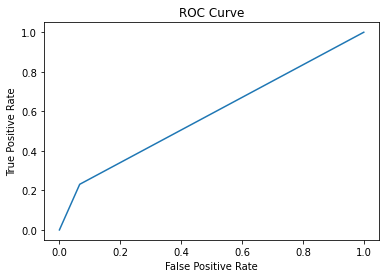

0.6538461538461537

In [28]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report, accuracy_score

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import roc_auc_score,roc_curve

multinomial = MultinomialNB()

multinomial.fit(X_train,y_train)

y_probs = multinomial.predict_proba(X_test)

y_pred = multinomial.predict(X_test)

y_pred_prob = y_probs[:,1]

print(confusion_matrix(y_test, y_pred)) 
print(classification_report (y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))

## Generate ROC curve values:

fpr, tpr, thresholds = roc_curve (y_test, y_pred)

# Plot ROC curve

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)

plt.xlabel("False Positive Rate") 

plt.ylabel("True Positive Rate")

plt.title("ROC Curve")

plt.show()

roc_auc_score(y_test, y_pred_prob)

# Find the error rate for different k values

In [30]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from sklearn.model_selection import GridSearchCV
import numpy as np
parameters = {'n_neighbors': np.arange(1,20)}
print(parameters)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)

knn = KNeighborsClassifier()
# Tuned according to accuracy score
cv = GridSearchCV(knn, param_grid=parameters,cv=kfold,scoring='roc_auc')

cv.fit(X_train, y_train )
print(cv.best_params_)
print(cv.best_score_)
print(cv.best_estimator_)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}
{'n_neighbors': 11}
0.6844006568144498
KNeighborsClassifier(n_neighbors=11)


##ROC_AUC value for k=  11 is: 0.6844006568144498

# KNN to find accuracy

In [34]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
# Tuned according to accuracy score
cv = GridSearchCV(knn, param_grid=parameters,cv=kfold)

cv.fit(X_train, y_train )
print(cv.best_params_)
print(cv.best_score_)
print(cv.best_estimator_)

{'n_neighbors': 4}
0.76
KNeighborsClassifier(n_neighbors=4)


# Observation:
K=4 is best model with accuracy 76%

In [33]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
# Tuned according to accuracy score
cv = GridSearchCV(knn, param_grid=parameters,cv=kfold,scoring='neg_log_loss')

cv.fit(X_train, y_train )
print(cv.best_params_)
print(cv.best_score_)
print(cv.best_estimator_)

{'n_neighbors': 12}
-0.5600748735691898
KNeighborsClassifier(n_neighbors=12)


# KNN RegGridCV:  

In [35]:
from sklearn.model_selection import RandomizedSearchCV

rcv = RandomizedSearchCV(knn, param_distributions=parameters,
                  cv=kfold,scoring='r2',n_iter=15,
                  random_state = 2021)
rcv.fit( X_train, y_train)

print(rcv.best_params_)
print(rcv.best_score_)
df_rnd = pd.DataFrame(rcv.cv_results_)
print(rcv.best_estimator_)

{'n_neighbors': 4}
-0.15554560382146604
KNeighborsClassifier(n_neighbors=4)


# RIDGE Regression

In [36]:
from sklearn.linear_model import Ridge

In [37]:
parameters = dict(alpha=np.linspace(0.001,40))

from sklearn.model_selection import GridSearchCV
clf = Ridge()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

In [38]:
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 8.17306122e-01, 1.63361224e+00, 2.44991837e+00,
       3.26622449e+00, 4.08253061e+00, 4.89883673e+00, 5.71514286e+00,
       6.53144898e+00, 7.34775510e+00, 8.16406122e+00, 8.98036735e+00,
       9.79667347e+00, 1.06129796e+01, 1.14292857e+01, 1.22455918e+01,...
       2.28575714e+01, 2.36738776e+01, 2.44901837e+01, 2.53064898e+01,
       2.61227959e+01, 2.69391020e+01, 2.77554082e+01, 2.85717143e+01,
       2.93880204e+01, 3.02043265e+01, 3.10206327e+01, 3.18369388e+01,
       3.26532449e+01, 3.34695510e+01, 3.42858571e+01, 3.51021633e+01,
       3.59184694e+01, 3.67347755e+01, 3.75510816e+01, 3.83673878e+01,
       3.91836939e+01, 4.00000000e+01])},
             scoring='roc_auc')

In [39]:
df_cv = pd.DataFrame(cv.cv_results_)

In [40]:
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

best_model = cv.best_estimator_

print(best_model.intercept_)

{'alpha': 38.36738775510204}
0.689260111254533
Ridge(alpha=38.36738775510204)
0.17508521659400034


# LASSO Regression:

In [41]:
from sklearn.linear_model import Lasso

In [42]:
parameters = dict(alpha=np.linspace(0.001,40))
from sklearn.model_selection import GridSearchCV
clf = Lasso()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

In [43]:
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 8.17306122e-01, 1.63361224e+00, 2.44991837e+00,
       3.26622449e+00, 4.08253061e+00, 4.89883673e+00, 5.71514286e+00,
       6.53144898e+00, 7.34775510e+00, 8.16406122e+00, 8.98036735e+00,
       9.79667347e+00, 1.06129796e+01, 1.14292857e+01, 1.22455918e+01,...
       2.28575714e+01, 2.36738776e+01, 2.44901837e+01, 2.53064898e+01,
       2.61227959e+01, 2.69391020e+01, 2.77554082e+01, 2.85717143e+01,
       2.93880204e+01, 3.02043265e+01, 3.10206327e+01, 3.18369388e+01,
       3.26532449e+01, 3.34695510e+01, 3.42858571e+01, 3.51021633e+01,
       3.59184694e+01, 3.67347755e+01, 3.75510816e+01, 3.83673878e+01,
       3.91836939e+01, 4.00000000e+01])},
             scoring='roc_auc')

In [44]:
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

best_model = cv.best_estimator_

print(best_model.intercept_)

{'alpha': 0.001}
0.665968721955867
Lasso(alpha=0.001)
0.09491217907850538


# ElasticNet Regression

In [45]:
from sklearn.linear_model import ElasticNet

In [46]:
parameters = dict(alpha=np.linspace(0.001,20,5),
                  l1_ratio=np.linspace(0.001,1,10))
from sklearn.model_selection import GridSearchCV
clf = ElasticNet()
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=2021,shuffle=True)
cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

In [47]:
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': array([1.000000e-03, 5.000750e+00, 1.000050e+01, 1.500025e+01,
       2.000000e+01]),
                         'l1_ratio': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])},
             scoring='roc_auc')

In [48]:
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

print(cv.best_estimator_)

best_model = cv.best_estimator_

print(best_model.intercept_)

{'alpha': 20.0, 'l1_ratio': 0.001}
0.698168695832565
ElasticNet(alpha=20.0, l1_ratio=0.001)
0.2934301934457489


# Logistic Regression

[[57  3]
 [21  5]]
              precision    recall  f1-score   support

           0       0.73      0.95      0.83        60
           1       0.62      0.19      0.29        26

    accuracy                           0.72        86
   macro avg       0.68      0.57      0.56        86
weighted avg       0.70      0.72      0.67        86

0.7209302325581395


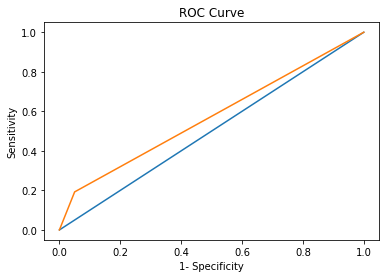

0.5711538461538461

In [55]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression() 
logreg.fit(X_train,y_train)

y_pred= logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred)) 

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

#ROC CURVE

y_pred_prob = logreg.predict_proba(X_test)

# Generate ROC curve

fpr, tpr, thresholds=roc_curve(y_test, y_pred)

#plot ROC curve

plt.plot([0, 1], [0, 1])

plt.plot(fpr, tpr)

plt.xlabel('1- Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test,y_pred)

In [56]:
from sklearn.metrics import log_loss

log_loss (y_test, y_pred_prob)

0.5684320312483484

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kFold = StratifiedKFold(n_splits=5, random_state = 2021, shuffle=True)

results = cross_val_score(logreg, X,Y,cv=kFold, scoring='roc_auc')

print (results)

print("ROC_AUC ",results.mean(), results.std())

#Using accuracy score

results_acc = cross_val_score(logreg,X,Y,cv=kFold)

print(results_acc)

print("Accuracy Score: %.4f (%.4f)"%(results_acc.mean(), results_acc.std()))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.65136298 0.625      0.73676471 0.75       0.6       ]
ROC_AUC  0.6726255380200861 0.060158784993279486
[0.70689655 0.66666667 0.73684211 0.77192982 0.71929825]
Accuracy Score: 0.7203 (0.0346)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_